In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette("coolwarm", 7)

In [2]:
aisles = pd.read_csv("data/aisles.csv")
departments = pd.read_csv("data/departments.csv")
orders = pd.read_csv("data/orders.csv")
order_products_prior = pd.read_csv("data/order_products__prior.csv")
order_products_train = pd.read_csv("data/order_products__train.csv")
products = pd.read_csv("data/products.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

### Plot with distribution of customer history

Text(0, 0.5, 'Users')

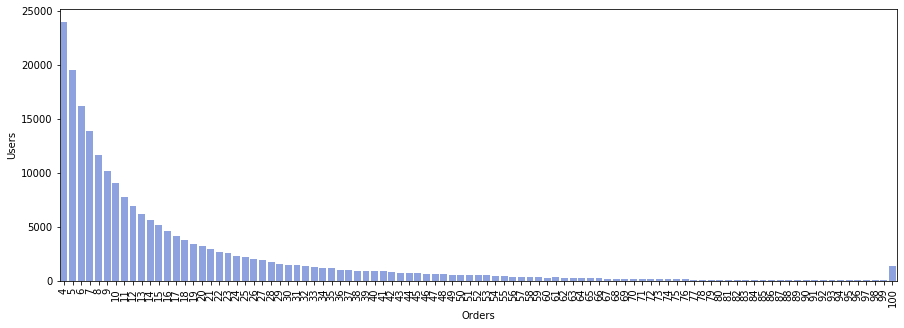

In [3]:
orders_per_user = orders[['user_id', 'eval_set', 'order_number']].query("eval_set != 'prior'")
orders_per_user = orders_per_user.order_number.value_counts()
plt.figure(figsize=(15,5))
sns.barplot(orders_per_user.index, orders_per_user.values, alpha=0.8, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Orders')
plt.ylabel('Users')

### Percentage of missing values

In [4]:
orders.isna().mean().round(5).to_frame('percentage') * 100

,percentage
order_id,0.000
user_id,0.000
eval_set,0.000
order_number,0.000
order_dow,0.000
order_hour_of_day,0.000
days_since_prior_order,6.028


### Plot with distribution by hours

Text(0, 0.5, 'Orders')

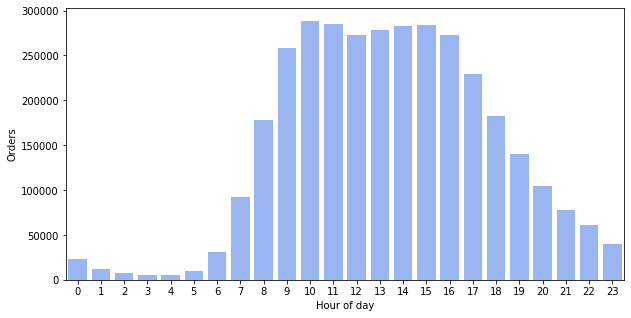

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(x='order_hour_of_day', data=orders, color=color[1])
plt.xlabel('Hour of day')
plt.ylabel('Orders')

### Plot with distribution by day of week

Text(0, 0.5, 'Orders')

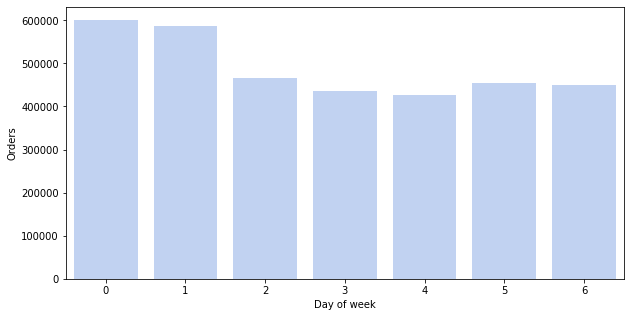

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='order_dow', data=orders, color=color[2])
plt.xlabel('Day of week')
plt.ylabel('Orders')

### Popular products

In [13]:
merged = pd.merge(order_products_prior, products, on = 'product_id')
merged = pd.merge(merged, aisles, on='aisle_id')
merged = pd.merge(merged, departments, on='department_id')
top20_products = merged.product_name.value_counts().head(20).to_frame('count')
top20_products

,count
Banana,472565
Bag of Organic Bananas,379450
Organic Strawberries,264683
Organic Baby Spinach,241921
Organic Hass Avocado,213584
Organic Avocado,176815
Large Lemon,152657
Strawberries,142951
Limes,140627
Organic Whole Milk,137905


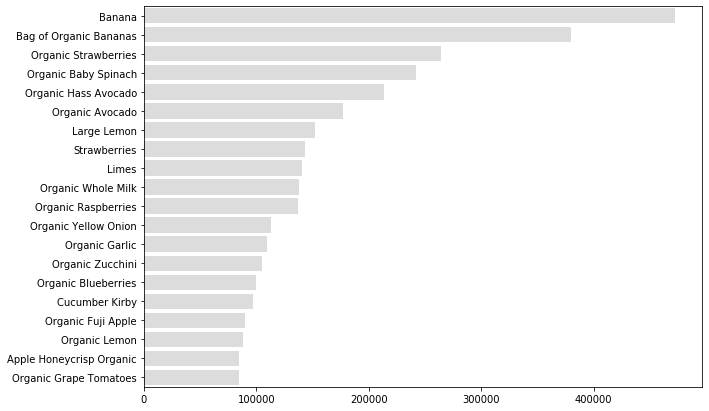

In [12]:
plt.figure(figsize=(10,7))
sns.barplot(top20_products.values, top20_products.index, color=color[3])

### Days since prior order

Text(0, 0.5, 'Count')

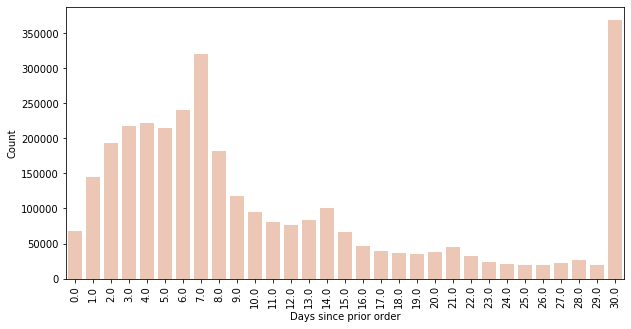

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='days_since_prior_order', data=orders, color=color[4])
plt.xlabel('Days since prior order')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

### Most popular aisles

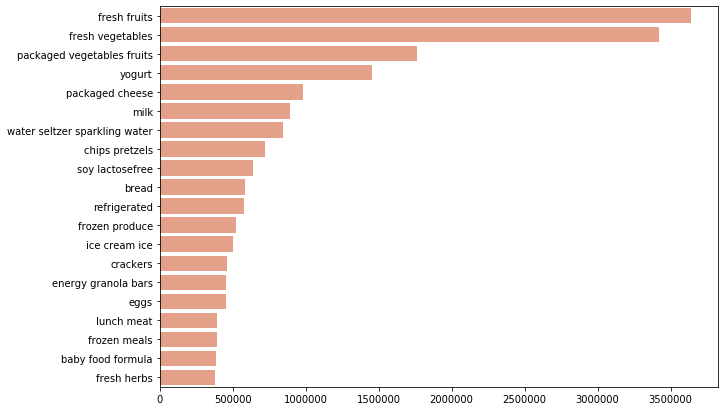

In [15]:
top20_aisles = merged.aisle.value_counts().head(20)
plt.figure(figsize=(10,7))
sns.barplot(top20_aisles.values, top20_aisles.index, color=color[5])

#### Analysis on customer profile

Text(0, 0.5, 'Orders')

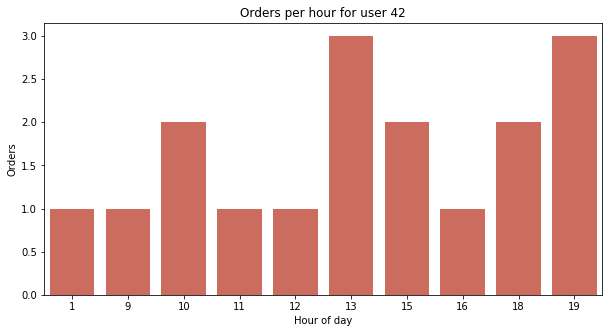

In [16]:
user_id_ = 42
user = orders.loc[orders.user_id == user_id_]
plt.figure(figsize=(10,5))
sns.countplot(x='order_hour_of_day', data=user, color=color[6])
plt.title('Orders per hour for user ' + str(user_id_))
plt.xlabel('Hour of day')
plt.ylabel('Orders')

Text(0, 0.5, 'Orders')

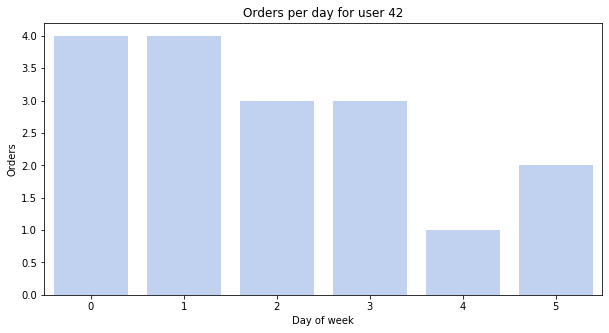

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='order_dow', data=user, color=color[2])
plt.title('Orders per day for user ' + str(user_id_))
plt.xlabel('Day of week')
plt.ylabel('Orders')

In [18]:
user_orders = pd.merge(merged, orders, on = 'order_id')
user_orders = user_orders.loc[user_orders['user_id'] == user_id_]
top10 = user_orders.product_name.value_counts().head(10).to_frame('count')
top10

,count
Sliced Sourdough Bread,6
Organic Blueberries,6
Veggie Loaf & Mashed Potatoes Entrée,5
Thin & Crispy Crust Four Cheese Pizza,5
Country Cheddar Bowl,5
Twinkies,4
Kitchen Cheese Enchilada,4
Whole Vitamin D Milk,4
Bowls Tortilla Casserole & Black Beans,4
Wild Albacore Tuna No Salt Added,4
